# PCA

In [1]:
using MultivariateStats, RDatasets, Plots

# load iris dataset
iris = dataset("datasets", "iris")

# split half to training set
Xtr = Matrix(iris[1:2:end,1:4])'
Xtr_labels = Vector(iris[1:2:end,5])

# split other half to testing set
Xte = Matrix(iris[2:2:end,1:4])'
Xte_labels = Vector(iris[2:2:end,5])

75-element Vector{CategoricalArrays.CategoricalValue{String, UInt8}}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [2]:
M = fit(PCA, Xtr; maxoutdim=3)

PCA(indim = 4, outdim = 3, principalratio = 0.9957325846529409)

Pattern matrix (unstandardized loadings):
────────────────────────────────────
         PC1         PC2         PC3
────────────────────────────────────
1   0.70954    0.344711   -0.160106
2  -0.227592   0.29865     0.215417
3   1.77976   -0.0797511   0.0197705
4   0.764206  -0.0453779   0.166764
────────────────────────────────────

Importance of components:
─────────────────────────────────────────────────────────
                                PC1        PC2        PC3
─────────────────────────────────────────────────────────
SS Loadings (Eigenvalues)  4.3068    0.216437   0.100239
Variance explained         0.927532  0.0466128  0.021588
Cumulative variance        0.927532  0.974145   0.995733
Proportion explained       0.931507  0.0468125  0.0216805
Cumulative proportion      0.931507  0.978319   1.0
─────────────────────────────────────────────────────────

In [3]:
Yte = predict(M, Xte)

3×75 Matrix{Float64}:
  2.72714    2.75491     2.32396   …  -1.92047   -1.74161   -1.37706
 -0.230916  -0.406149    0.646374      0.246554   0.127625  -0.280295
  0.253119   0.0271266  -0.230469     -0.180044  -0.123165  -0.314992

In [4]:
Xr = reconstruct(M, Yte)

4×75 Matrix{Float64}:
 4.86449  4.61087   5.40782   5.00775   …  6.79346  6.58825  6.46774  5.94384
 3.04262  3.08695   3.89061   3.39069      3.20785  3.13416  3.03873  2.94737
 1.46099  1.48132   1.68656   1.48668      5.91124  5.39197  5.25542  5.02469
 0.10362  0.229519  0.421233  0.221041     2.28224  1.99665  1.91243  1.91901

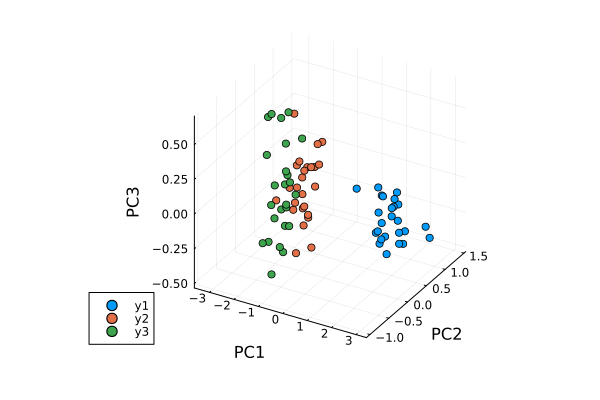

In [5]:
setosa = Yte[:,Xte_labels.=="setosa"]
versicolor = Yte[:,Xte_labels.=="versicolor"]
virginica = Yte[:,Xte_labels.=="virginica"]

p = scatter(setosa[1,:],setosa[2,:],setosa[3,:],marker=:circle,linewidth=0)
scatter!(versicolor[1,:],versicolor[2,:],versicolor[3,:],marker=:circle,linewidth=0)
scatter!(virginica[1,:],virginica[2,:],virginica[3,:],marker=:circle,linewidth=0)
plot!(p,xlabel="PC1",ylabel="PC2",zlabel="PC3")

# Matriz de Covarianza

In [1]:
# Celda 1: Carga y preparación
using LinearAlgebra, Statistics, RDatasets, Plots
plotly()

# Cargar el dataset Iris
iris = dataset("datasets", "iris")

# Separar las 4 características (features) en una matriz X
# Nota: organizamos los datos con cada observación en una columna (4 filas x 150 columnas)
X = Matrix(iris[:, 1:4])'
labels = iris.Species

println("Tamaño de la matriz de datos X: ", size(X))

# Centrar los datos: restar la media de cada fila (cada característica)
media_features = mean(X, dims=2)
X_centrado = X .- media_features

println("Datos centrados con éxito.")

Tamaño de la matriz de datos X: (4, 150)
Datos centrados con éxito.


In [2]:
# Celda 2: Calcular la matriz de covarianza
# Usamos la función `cov` indicando que las observaciones están en las columnas (dims=2)
Σ = cov(X_centrado, dims=2)

println("--- Matriz de Covarianza (Σ) de 4x4 ---")
display(round.(Σ, digits=4))

--- Matriz de Covarianza (Σ) de 4x4 ---


4×4 Matrix{Float64}:
  0.6857  -0.0424   1.2743   0.5163
 -0.0424   0.19    -0.3297  -0.1216
  1.2743  -0.3297   3.1163   1.2956
  0.5163  -0.1216   1.2956   0.581

In [3]:
# Celda 3: Calcular eigenvalores y eigenvectores
F = eigen(Σ)
eigen_vals = F.values
eigen_vecs = F.vectors

# Los eigenvalores y eigenvectores deben ordenarse de mayor a menor importancia
indices_ordenados = sortperm(eigen_vals, rev=true)
eigen_vals_ordenados = eigen_vals[indices_ordenados]
eigen_vecs_ordenados = eigen_vecs[:, indices_ordenados]

println("--- Eigenvalores Ordenados (Varianza por cada componente) ---")
display(eigen_vals_ordenados)

println("\n--- Eigenvectores Ordenados (Componentes Principales) ---")
display(eigen_vecs_ordenados)

--- Eigenvalores Ordenados (Varianza por cada componente) ---


4-element Vector{Float64}:
 4.228241706034862
 0.24267074792863336
 0.07820950004291922
 0.02383509297344952


--- Eigenvectores Ordenados (Componentes Principales) ---


4×4 Matrix{Float64}:
 -0.361387    0.656589   0.58203     0.315487
  0.0845225   0.730161  -0.597911   -0.319723
 -0.856671   -0.173373  -0.0762361  -0.479839
 -0.358289   -0.075481  -0.545831    0.753657

In [4]:
# Celda 4: Análisis de varianza
varianza_explicada = eigen_vals_ordenados ./ sum(eigen_vals_ordenados)
varianza_acumulada = cumsum(varianza_explicada)

println("Varianza explicada por cada componente: ", round.(varianza_explicada, digits=4))
println("Varianza acumulada: ", round.(varianza_acumulada, digits=4))

# Decidimos quedarnos con los 3 primeros componentes, que explican >99% de la varianza
W = eigen_vecs_ordenados[:, 1:3]
println("\nMatriz de transformación W (top 3 eigenvectores):")
display(W)

Varianza explicada por cada componente: [0.9246, 0.0531, 0.0171, 0.0052]
Varianza acumulada: [0.9246, 0.9777, 0.9948, 1.0]

Matriz de transformación W (top 3 eigenvectores):


4×3 Matrix{Float64}:
 -0.361387    0.656589   0.58203
  0.0845225   0.730161  -0.597911
 -0.856671   -0.173373  -0.0762361
 -0.358289   -0.075481  -0.545831

In [5]:
# Celda 5: Proyectar los datos
# La nueva matriz Y tendrá dimensiones 3x150
Y = W' * X_centrado

println("Datos proyectados al nuevo espacio de 3 dimensiones.")
println("Tamaño de la nueva matriz de datos Y: ", size(Y))

Datos proyectados al nuevo espacio de 3 dimensiones.
Tamaño de la nueva matriz de datos Y: (3, 150)


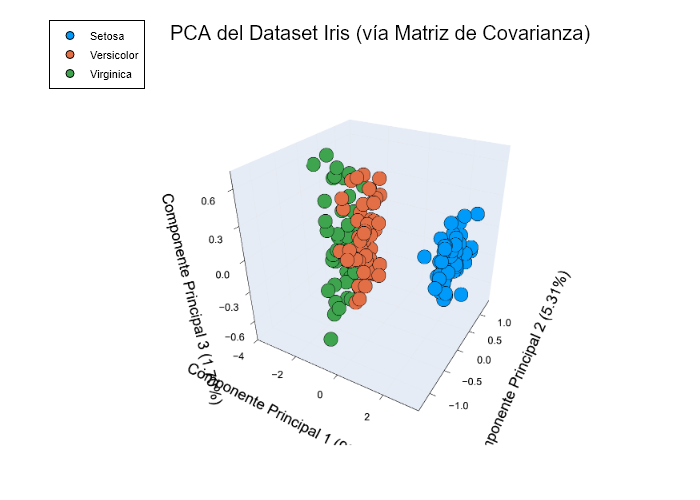

In [6]:
# Celda 6: Graficar los resultados
# Separamos los datos por especie para colorearlos
setosa_idx = labels .== "setosa"
versicolor_idx = labels .== "versicolor"
virginica_idx = labels .== "virginica"

p = scatter(
    Y[1, setosa_idx], Y[2, setosa_idx], Y[3, setosa_idx],
    label="Setosa", marker=:circle
)
scatter!(p,
    Y[1, versicolor_idx], Y[2, versicolor_idx], Y[3, versicolor_idx],
    label="Versicolor", marker=:circle
)
scatter!(p,
    Y[1, virginica_idx], Y[2, virginica_idx], Y[3, virginica_idx],
    label="Virginica", marker=:circle
)

# Configuramos el gráfico
plot!(p,
    title="PCA del Dataset Iris (vía Matriz de Covarianza)",
    xlabel="Componente Principal 1 (92.46%)",
    ylabel="Componente Principal 2 (5.31%)",
    zlabel="Componente Principal 3 (1.70%)",
    legend=:topleft
)